In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.spatial import distance

In [4]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

from routing.vrp_ortools import utils, vrp_ortools as vrp

In [14]:
depot, vehicle_count, vehicle_capacity, customers, cust_demand, cust_location = utils.input_data("./routing/data/vrp_51_5_1")

In [15]:
data = {}

data['num_vehicles'] = vehicle_count
data['depot'] = 0
data["vehicle_capacities"] = [vehicle_capacity] * vehicle_count

data["demands"] = cust_demand
data["distance_matrix"] = utils.compute_euclidean_distance_matrix(data_points=cust_location, dist_scale_param=1)

In [19]:
search_parameters = pywrapcp.DefaultRoutingSearchParameters()

search_parameters.first_solution_strategy = (
    routing_enums_pb2.FirstSolutionStrategy.AUTOMATIC)
search_parameters.local_search_metaheuristic = (
    routing_enums_pb2.LocalSearchMetaheuristic.SIMULATED_ANNEALING)
search_parameters.time_limit.seconds = 180

In [20]:
assignment, routing, manager = vrp.cvrp_model(data, search_parameters, 3000, 100)

In [21]:
vehicle_tours, dist_tours, dist_est = utils.output_solution(assignment, routing, manager, data)
distance_by_tour = utils.compute_total_tours_dist(vehicle_tours, cust_location, data['depot'])
obj = sum(distance_by_tour)

In [22]:
for idx_veh, tour_dist in enumerate(distance_by_tour):
    print(f"Vehicle {idx_veh} tour distance: {tour_dist}")
print(f"Total distance: {obj}")

Vehicle 0 tour distance: 140.42755756503263
Vehicle 1 tour distance: 140.70143890385992
Vehicle 2 tour distance: 122.13221865018481
Vehicle 3 tour distance: 131.19303910357564
Vehicle 4 tour distance: 110.39852394662124
Total distance: 644.8527781692742


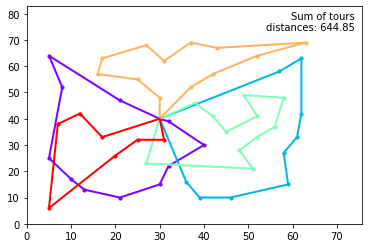

In [23]:
utils.plot_vrp(vehicle_tours, cust_location, 1.2, 2, obj)